In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import re
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)
import sys
np.set_printoptions(threshold=sys.maxsize)

In [5]:
#Load Dataset 
cars = pd.read_csv("cars.csv")
cars.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.000
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.000
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.000
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.000
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.000
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.000
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.000


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
#Null Values 
cars.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [8]:
#Dropping null values for now as null values represent less than 5 percent of the data. Imputing these values with mean or mode values may reduce the accuracy. 
data = cars.dropna(how = 'any')
data.shape

(7906, 13)

In [9]:
#Cleaning the torgue column. 
torque_list = data['torque'].to_list()
new_torque = []
def extractingRPM(x):
  for item in x:
    res = item.replace(".", "")
    res = res.replace(",", "")
    temp = [int(s) for s in re.findall(r'\d+', res)]
    new_torque.append(max(temp))

extractingRPM(torque_list)
print(torque_list[:2])
print(new_torque[:2])

['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm']
[2000, 2500]


In [10]:
#Adding the new torgue column to the dataframe. 
data['new_torque'] = new_torque
data.head(5)

/var/folders/w1/p87qjxtn10df3k0k_f0j_3rr0000gn/T/ipykernel_89370/465810393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['new_torque'] = new_torque


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,new_torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.000,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.000,2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.000,2700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.000,2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.000,4500


In [11]:
#Cleaning the mileage Column
data['mileage'] = data['mileage'].astype(str)
data['mileage'] = data["mileage"].apply(lambda x: x.replace(" kmpl", ""))
data['mileage'] = data["mileage"].apply(lambda x: x.replace(" km/kg", ""))
data['mileage'] = data['mileage'].astype(float)
data.head()

/var/folders/w1/p87qjxtn10df3k0k_f0j_3rr0000gn/T/ipykernel_89370/2122597813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mileage'] = data['mileage'].astype(str)
/var/folders/w1/p87qjxtn10df3k0k_f0j_3rr0000gn/T/ipykernel_89370/2122597813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mileage'] = data["mileage"].apply(lambda x: x.replace(" kmpl", ""))
/var/folders/w1/p87qjxtn10df3k0k_f0j_3rr0000gn/T/ipykernel_89370/2122597813.py:4: SettingWithCopyWarning: 
A value is trying to be set o

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,new_torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400,1248 CC,74 bhp,190Nm@ 2000rpm,5.000,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.140,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.000,2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.000,2700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.000,2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.000,4500


In [12]:
#Cleaning the engine column 
data['engine'] = data['engine'].astype(str)
data['engine'] = data["engine"].apply(lambda x: x.replace(" CC", ""))
data['engine'] = data['engine'].astype(float)
data.head()

/var/folders/w1/p87qjxtn10df3k0k_f0j_3rr0000gn/T/ipykernel_89370/2796414876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['engine'] = data['engine'].astype(str)
/var/folders/w1/p87qjxtn10df3k0k_f0j_3rr0000gn/T/ipykernel_89370/2796414876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['engine'] = data["engine"].apply(lambda x: x.replace(" CC", ""))
/var/folders/w1/p87qjxtn10df3k0k_f0j_3rr0000gn/T/ipykernel_89370/2796414876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,new_torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400,1248.000,74 bhp,190Nm@ 2000rpm,5.000,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.140,1498.000,103.52 bhp,250Nm@ 1500-2500rpm,5.000,2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700,1497.000,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.000,2700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000,1396.000,90 bhp,22.4 kgm at 1750-2750rpm,5.000,2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100,1298.000,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.000,4500


In [13]:
power_list = data['max_power'].to_list()
# torque_list[:2]
max_power = []
def extractingPower(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    max_power.append(max(temp))

extractingPower(power_list)
print(power_list[:2])
print(max_power[:10])

['74 bhp', '103.52 bhp']
[74.0, 103.52, 78.0, 90.0, 88.2, 81.86, 57.5, 37.0, 67.1, 68.1]


In [14]:
data['max_power'] = max_power

/var/folders/w1/p87qjxtn10df3k0k_f0j_3rr0000gn/T/ipykernel_89370/3788216878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['max_power'] = max_power


In [15]:
data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,new_torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400,1248.000,74.000,190Nm@ 2000rpm,5.000,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.140,1498.000,103.520,250Nm@ 1500-2500rpm,5.000,2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700,1497.000,78.000,"12.7@ 2,700(kgm@ rpm)",5.000,2700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000,1396.000,90.000,22.4 kgm at 1750-2750rpm,5.000,2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100,1298.000,88.200,"11.5@ 4,500(kgm@ rpm)",5.000,4500


In [16]:
new_df = data.drop(['torque'], axis = 1)
new_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,new_torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400,1248.000,74.000,5.000,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.140,1498.000,103.520,5.000,2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700,1497.000,78.000,5.000,2700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000,1396.000,90.000,5.000,2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100,1298.000,88.200,5.000,4500


In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   float64
 10  max_power      7906 non-null   float64
 11  seats          7906 non-null   float64
 12  new_torque     7906 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 864.7+ KB


In [18]:
#Converting object columns into float. 
data[["mileage", "engine","max_power","new_torque"]] = data[["mileage", "engine","max_power","new_torque"]].apply(pd.to_numeric)
data.head()

/Users/krishnabakshi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,new_torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400,1248.000,74.000,190Nm@ 2000rpm,5.000,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.140,1498.000,103.520,250Nm@ 1500-2500rpm,5.000,2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700,1497.000,78.000,"12.7@ 2,700(kgm@ rpm)",5.000,2700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000,1396.000,90.000,22.4 kgm at 1750-2750rpm,5.000,2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100,1298.000,88.200,"11.5@ 4,500(kgm@ rpm)",5.000,4500


<AxesSubplot:>

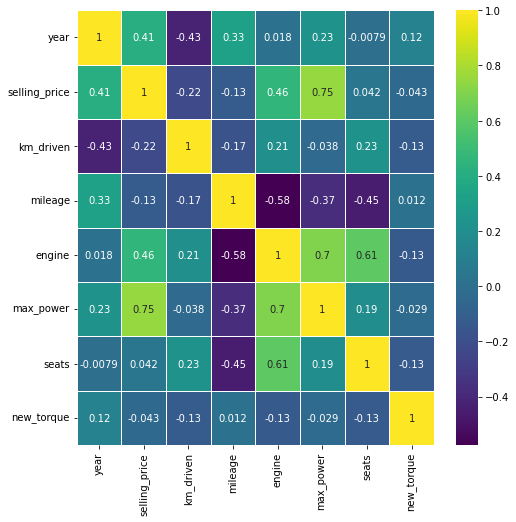

In [19]:
#Correlation Matrix 
plt.figure(figsize=(8,8))
sns.heatmap(new_df.corr(),annot=True,cmap='viridis',linewidths=.5)

In [20]:
#There is high correlation of selling price with max_power output of the car
# There is a moderate or low correlation among most columns.

In [21]:
new_df['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [22]:
new_df['seller_type'].value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [23]:
new_df['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [24]:
new_df['owner'].value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

In [25]:
#Assigning categorical columns for our catboost model. 
categorical_cols = ['fuel','seller_type','transmission'] 

In [26]:
y = new_df["selling_price"]
X = new_df.drop(['selling_price', 'owner'], axis = 1)

In [27]:
#Splilting data into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
#Modelling.
from catboost import CatBoostRegressor, Pool


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=42)

pool_train = Pool(X_train, y_train,
                  cat_features = ['fuel','seller_type','transmission','name'])

pool_test = Pool(X_test, cat_features = ['fuel','seller_type','transmission','name'])

cb = CatBoostRegressor(n_estimators=200,
                       loss_function='RMSE',
                       learning_rate=0.4,
                       depth=3, task_type='CPU',
                       random_state=1,
                       verbose=False)


cb.fit(pool_train)
y_pred = cb.predict(pool_test)

import numpy as np
from sklearn.metrics import mean_squared_error as mse

cb_rmse = mse(y_test, y_pred)
print("RMSE in y units:", np.mean(cb_rmse))
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

RMSE in y units: 17003648512.804367
0.9755442783424492


In [29]:
#R2 score for train set. 
print(round(cb.score(X_train, y_train), 2))

0.98


In [30]:
#Prediction values 
y_pred[:5]

array([434441.85584075, 541294.80109205, 217368.98251668, 445387.40739865,
       642092.53129353])

In [31]:
#R2 score for test set.
print(round(cb.score(X_test, y_test), 2))

0.98


In [32]:
#R2 score is 0.98 which means our model is performing extremely well. 

In [34]:
# Save the trained model as a pickle file.
import pickle 
pickle.dump(cb, open('model.pkl', 'wb'))